In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

In [2]:
# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [3]:
# Import functions to work with sparse matrices
from scipy.sparse import vstack, hstack, csr_matrix

In [4]:
# Library used for textual data preprocessing
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold

[nltk_data] Downloading package stopwords to C:\Users\Sudipta
[nltk_data]     Dey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Import LabelBinarizer to convert labels into numerical representations
from sklearn.preprocessing import LabelBinarizer

In [6]:
# Import the ML models for regression tasks
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


In [7]:
# Import time format
import time

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
# Load Train Dataset from github repository
train = pd.read_csv('train.tsv', sep = '\t')
     


In [9]:
# Load Test Dataset from github repository
test = pd.read_csv('test.tsv', sep = '\t')
     

In [10]:
# Create combined set.
combined = pd.concat([train,test])

# Create the submission set (Only contains the test ID)
submission = test[['test_id']]

# Create size of train
train_size = len(train)

# Create log price variable (Transformation)
y = np.log1p(train['price'])

# Selecting 10% of the combined dataset and resetting the index for the new subset.
combined_ML = combined.sample(frac=0.1).reset_index(drop=True)

In [11]:
# Dataset First Look
# View top 5 rows of the dataset
combined_ML.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
0,NaN,For Grizelda 2 Vs Fragrance mists,3,Beauty/Fragrance/Women,Victoria's Secret,NaN,1,Large size 8.4 oz Secret Charm used a few time...,497374.0
1,451185.0,Marc Fisher Jodi Flats,3,Women/Shoes/Flats,NaN,16.0,0,Round Toe black leather flats. Almost new - pl...,NaN
2,NaN,Fiona Stiles Matte Foundation 01,2,Beauty/Makeup/Face,NaN,NaN,1,•Color = 01 Porcelain •1 fl oz •Matte Finish •...,223845.0
3,774269.0,Women's gray tunic sweater,2,Women/Tops & Blouses/Tunic,Mossimo,10.0,1,No description yet,NaN
4,163546.0,Victoria's Secret Rose Gold Bag,1,Women/Women's Handbags/Totes & Shoppers,Victoria's Secret,21.0,0,"Brand new items, firm price, free small item w...",NaN


# Dataset Rows & Columns count 

In [12]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",combined_ML.shape[0])
print("Number of columns are: ",combined_ML.shape[1])

Number of rows are:  217589
Number of columns are:  9


# Dataset Information

In [13]:
# Dataset Info
# Checking information about the dataset using info
combined_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217589 entries, 0 to 217588
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           148337 non-null  float64
 1   name               217589 non-null  object 
 2   item_condition_id  217589 non-null  int64  
 3   category_name      216737 non-null  object 
 4   brand_name         125064 non-null  object 
 5   price              148337 non-null  float64
 6   shipping           217589 non-null  int64  
 7   item_description   217589 non-null  object 
 8   test_id            69252 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.9+ MB


# Duplicate Values

In [14]:
# Dataset Duplicate Value Count
dup = combined_ML.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


# Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
combined_ML.isnull().sum()

train_id              69252
name                      0
item_condition_id         0
category_name           852
brand_name            92525
price                 69252
shipping                  0
item_description          0
test_id              148337
dtype: int64

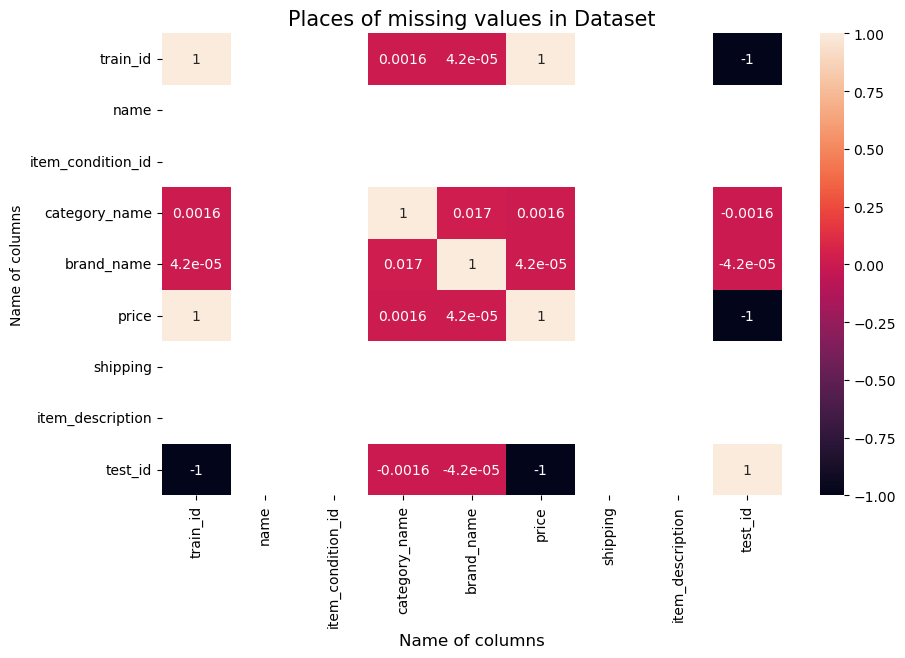

In [16]:
# Visualizing the missing values
# Set the plot size
plt.figure(figsize = (10,6))

# Create the figure object
sns.heatmap(combined_ML.isnull().corr(), vmin=-1, annot= True)

# Set labels
plt.xlabel('Name of columns', fontsize=12)
plt.ylabel('Name of columns', fontsize=10)
plt.title('Places of missing values in Dataset', fontsize=15)

# To show
plt.show()

# Understanding Your Variables*

In [17]:
# Dataset Columns
combined_ML.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'test_id'],
      dtype='object')

In [18]:
# Dataset Describe (all columns included)
combined_ML.describe(include= 'all').round(2)
     

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,test_id
count,148337.00,217589,217589.00,216737,125064,148337.00,217589.00,217589,69252.00
unique,NaN,199396,NaN,1087,2707,NaN,NaN,195194,NaN
top,NaN,Bundle,NaN,"Women/Athletic Apparel/Pants, Tights, Leggings",Nike,NaN,NaN,No description yet,NaN
freq,NaN,327,NaN,8695,7977,NaN,NaN,12186,NaN
mean,741312.20,NaN,1.91,NaN,NaN,26.77,0.45,NaN,346462.72
std,428139.26,NaN,0.90,NaN,NaN,38.35,0.50,NaN,199900.05
min,1.00,NaN,1.00,NaN,NaN,0.00,0.00,NaN,12.00
25%,369701.00,NaN,1.00,NaN,NaN,10.00,0.00,NaN,173924.00
50%,743383.00,NaN,2.00,NaN,NaN,17.00,0.00,NaN,346148.50
75%,1111645.00,NaN,3.00,NaN,NaN,29.00,1.00,NaN,519318.75


In [19]:

# Train set describe (price column)
train.price.describe()
     

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

### Variables Description
#### Check Unique Values for each variable. 

In [20]:
# Check Unique Values for each variable using a for loop.
for i in combined_ML.columns.tolist():
  print("No. of unique values in",i,"is",combined_ML[i].nunique())

No. of unique values in train_id is 148337
No. of unique values in name is 199396
No. of unique values in item_condition_id is 5
No. of unique values in category_name is 1087
No. of unique values in brand_name is 2707
No. of unique values in price is 451
No. of unique values in shipping is 2
No. of unique values in item_description is 195194
No. of unique values in test_id is 69252


## Data Wrangling*
### Data Wrangling Code

In [21]:
# Handling Missing Values & Missing Value Imputation
# Function to handle missing values in the DataFrame
def handle_missing_values(df):
    df['category_name'].fillna(value='missing', inplace=True)
    df['brand_name'].fillna(value='None', inplace=True)
    df['item_description'].fillna(value='None', inplace=True)
     


In [22]:
# Handling Missing Values in combined and ML combined
handle_missing_values(combined)
handle_missing_values(combined_ML)

In [23]:
# Converting specific columns to categorical data types
# Function to convert specific columns to categorical data types
def to_categorical(df):
    df['brand_name'] = df['brand_name'].astype('category')
    df['category_name'] = df['category_name'].astype('category')
    df['item_condition_id'] = df['item_condition_id'].astype('category')
     

In [24]:
# Applying 'to_categorical' function in combined and ML combined DataFrames
to_categorical(combined)
to_categorical(combined_ML)

In [25]:
# Convert the 'item_description' column to a string data type for both combined and ML combined
combined.item_description = combined.item_description.astype(str)
combined_ML.item_description = combined_ML.item_description.astype(str)

## To make the data analysis ready i have done the following:
Filled missing values in 'category_name' with 'missing'.-----
Filled missing values in 'brand_name' with 'None'.-----
Filled missing values in 'item_description' with 'None'.-----
Convert type of brand_name to categorical data type.-----
Convert type of category_name to categorical data type.-----
Convert type of item_condition_id to categorical data type.-----
Convert type of item_description to string data type.

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

## Price Distribution

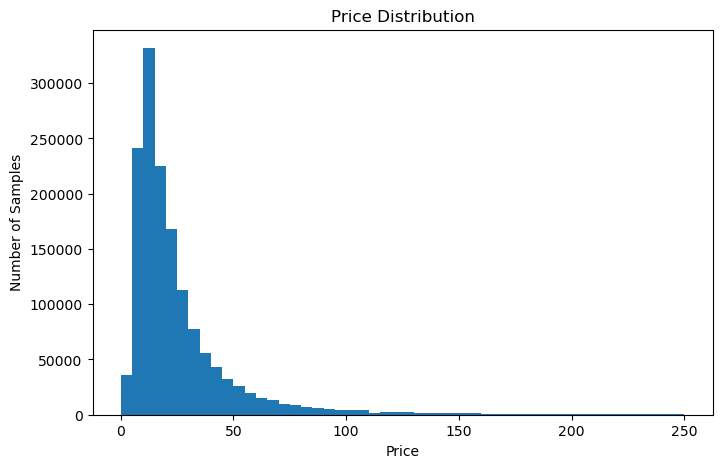

In [26]:
# Chart - 1 Visualization Code For Price Distribution
# Set the figure size
plt.figure(figsize=(8, 5))

# Create a histogram of the 'price' column
plt.hist(train['price'], bins=50, range=[0, 250], label='price')

# Set the title and axis labels
plt.title('Price Distribution', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Number of Samples', fontsize=10)

# Display the plot
plt.show()

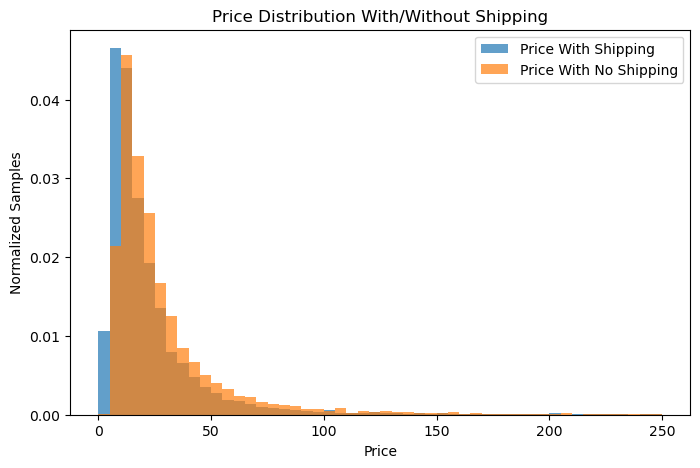

In [27]:
# Filter data for items with shipping (shipping=1) and without shipping (shipping=0)
shipping = train[train['shipping'] == 1]['price']
no_shipping = train[train['shipping'] == 0]['price']

# Set the figure size
plt.figure(figsize=(8, 5))

# Create histograms for both cases
plt.hist(shipping, bins=50, density=True, range=[0, 250], alpha=0.7, label='Price With Shipping')
plt.hist(no_shipping, bins=50, density=True, range=[0, 250], alpha=0.7, label='Price With No Shipping')

# Set the title and axis labels
plt.title('Price Distribution With/Without Shipping', fontsize=12)
plt.xlabel('Price', fontsize=10)
plt.ylabel('Normalized Samples', fontsize=10)

# Add a legend with font size
plt.legend(fontsize=10)

# Display the plot
plt.show()

In [28]:
#From the above chart, we got to know that the most number of sample's price is vary between 10 to 20.

## Distribution of Top 10 Brand

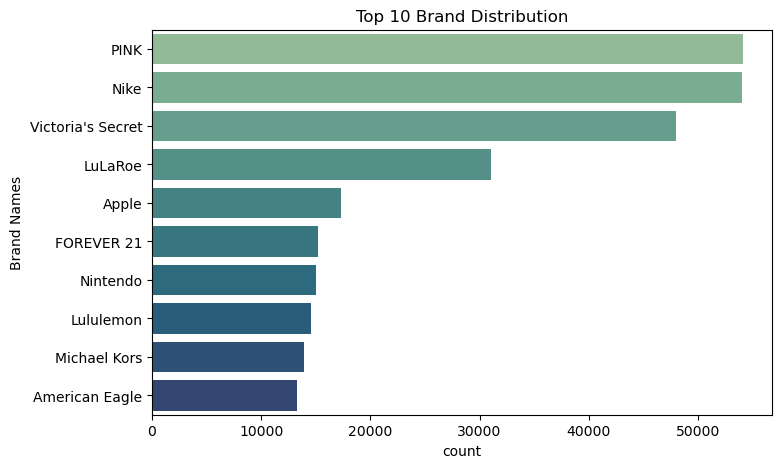

In [29]:
# Chart - 2 Bar Plot Visualization Code for Top 10 Brands Distribution
# Get the top 10 brands by their count and create a DataFrame
top_10_brands = train['brand_name'].value_counts()[:10].reset_index().rename(columns={'index': 'brand_name', 'brand_name': 'count'})

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot for brand distribution
ax = sns.barplot(x="count", y="brand_name", data=top_10_brands, palette="crest")

# Set the title and axis labels
ax.set_title('Top 10 Brand Distribution', fontsize=12)
plt.ylabel('Brand Names', fontsize=10)

# Show the plot
plt.show()

In [30]:
#From above bar plot we can clearly see that the most popular brands are PINK, Nike, followed by Victoria's Secret and LuLaRoe

## Distribution of Top 10 Expensive Brands

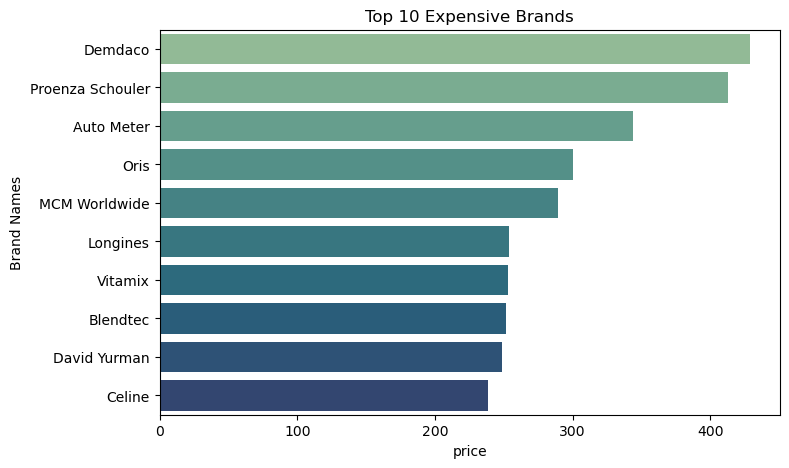

In [31]:
# Chart - 3 Bar Plot Visualization Code for Top 10 Expensive Brands Distribution
# Calculate the mean price for the top 10 brands
top10_brand = train.groupby('brand_name').mean()
df_expPrice = pd.DataFrame(top10_brand['price'].nlargest(10).reset_index())

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot for the top 10 expensive brands using the defined color palette
ax = sns.barplot(x="price", y="brand_name", data=df_expPrice, palette="crest")

# Set the title and axis labels
ax.set_title('Top 10 Expensive Brands', fontsize=12)
plt.ylabel('Brand Names', fontsize=10)

# Show the plot
plt.show()
     


In [32]:
#From above bar plot we found that the Demdaco, Proenza Schouler are top most expensive brands followed by Auto Meter,
#Oris and MCM Worldwide.

## Distribution of Top 10 Main Categories

In [33]:
# Define a function to split the category name into main, sub1, and sub2 categories
def transform_category_name(category_name):
    try:
        main, sub1, sub2 = category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

# Apply the transformation function to the 'category_name' column and create new columns
train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

# Create a DataFrame with the main, sub1, sub2 categories, and the 'price' column
cat_train = train[['category_main', 'category_sub1', 'category_sub2', 'price']]

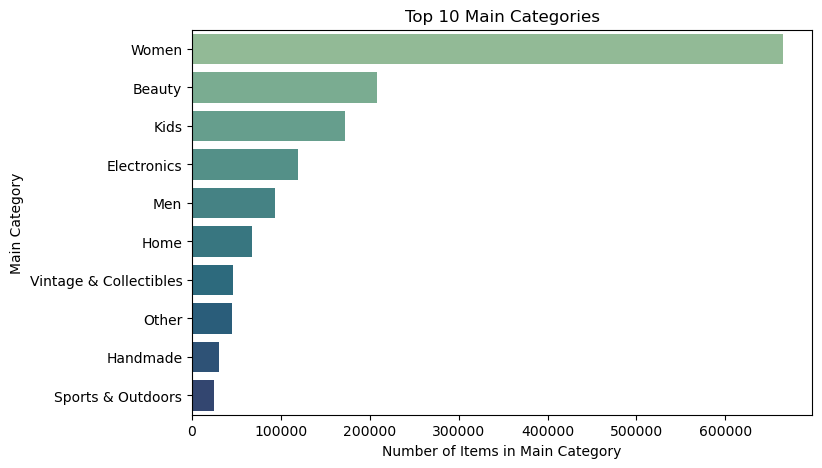

In [34]:
# Chart - 4 Count Plot Visualization Code for Top 10 Main Categories
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a count plot for the top 10 main categories
sns.countplot(y=train['category_main'], order=train['category_main'].value_counts().index, orient='v', palette="crest")

# Set the title with a larger font size
plt.title('Top 10 Main Categories', fontsize=12)

# Set the y-axis label and x-axis label with appropriate font sizes
plt.ylabel('Main Category', fontsize=10)
plt.xlabel('Number of Items in Main Category', fontsize=10)

# Show the plot
plt.show()

In [35]:
#From above graph, it is observed that Women is the top most main category. Followed by Beauty, Kids and Electronics.

## Category Distribution With/Without Brand

In [36]:
# Create a "no_brand" column
train['no_brand'] = train['brand_name'].isnull()
     

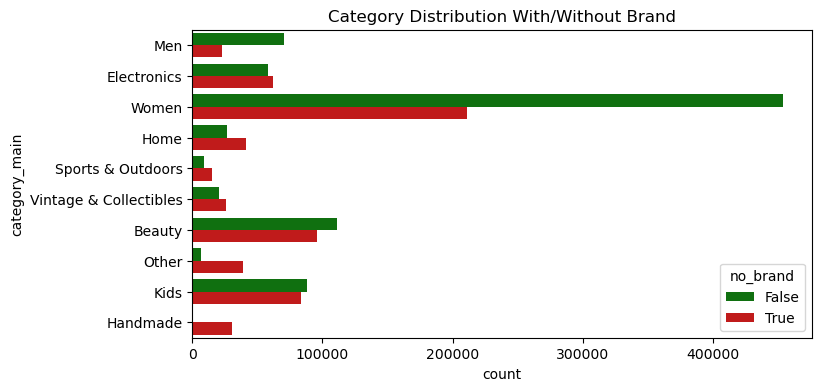

In [37]:
# Chart - 5 Count Plot Visualization Code for Category Distribution With/Without Brand
# Set the figure size for the plot
f, ax = plt.subplots(figsize=(8, 4))

# Create a count plot for the distribution of categories with and without brand
sns.countplot(y='category_main', hue='no_brand', data=train, palette=['green', '#db0000'])

# Set the title
ax.set_title('Category Distribution With/Without Brand', fontsize=12)

# Show the plot
plt.show()

In [38]:
#From above graph, it is observed that category distribution with and without brand, both are high for women category.

## Distribution of Top 10 2nd Categories

In [39]:
# Group the data by 'category_sub2' and calculate the mean price
df = cat_train.groupby(['category_sub2'])['price'].agg(['mean']).reset_index()

# Rename the columns for clarity
df = df.rename(columns={'category_sub2': 'Sub Category 2', 'mean': 'Mean Price'})

# Sort the DataFrame by mean price in descending order and select the top 10 rows
df = df.sort_values('Mean Price', ascending=False).head(10)
     

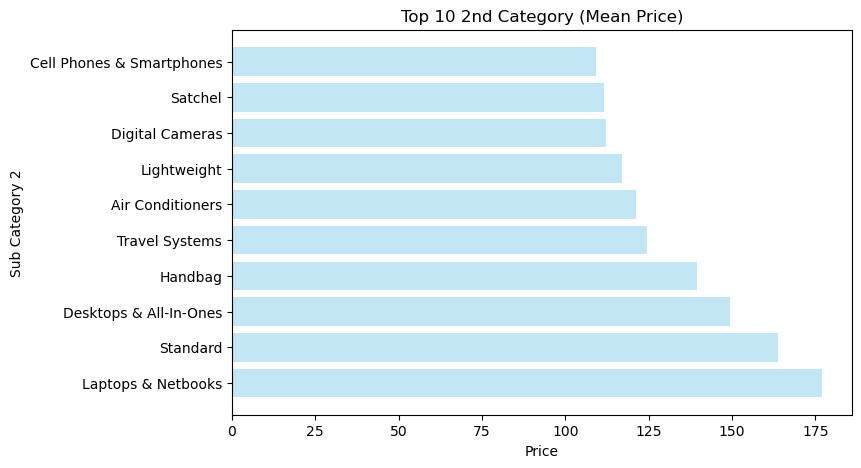

In [40]:
# Chart - 6 Count Plot Visualization Code for Top 10 2nd Category
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a horizontal bar plot
plt.barh(range(0, len(df)), df['Mean Price'], align='center', alpha=0.5, color='skyblue')

# Set the y-axis labels to display the subcategories
plt.yticks(range(0, len(df)), df['Sub Category 2'], fontsize=10)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Price', fontsize=10)
plt.ylabel('Sub Category 2', fontsize=10)
plt.title('Top 10 2nd Category (Mean Price)', fontsize=12)

# Show the plot
plt.show()

In [41]:
#From the above chart we come to know that compare to the mean price, Cell Phones & Smartphones are in the top. 
#Followed by Satchel, Digital Cameras, Lightweight and Air Conditioners are in the top of 2nd category list.

## Distribution of Top 10 1st Categories

In [42]:
# Group by the 1st subcategory and calculate the mean price
df = cat_train.groupby(['category_sub1'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})

# Sort the data by mean price in descending order and select the top 10
df = df.sort_values('mean', ascending=False).head(10)
     

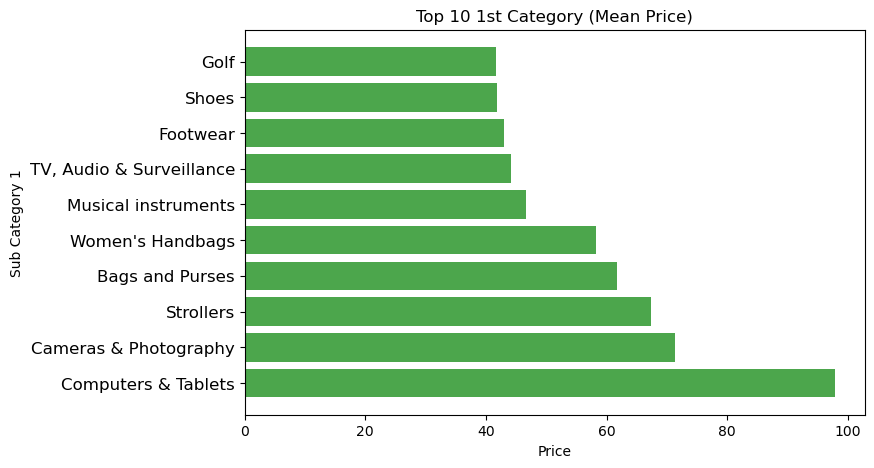

In [43]:
# Chart - 7 Count Plot Visualization Code for Top 10 1st Category
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a horizontal bar plot with a different color
plt.barh(range(0, len(df)), df['mean'], align='center', alpha=0.7, color='green')

# Set the y-axis labels to display the 1st subcategories
plt.yticks(range(0, len(df)), df['category_sub1'], fontsize=12)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Price', fontsize=10)
plt.ylabel('Sub Category 1', fontsize=10)
plt.title('Top 10 1st Category (Mean Price)', fontsize=12)

# Show the plot
plt.show()
     


In [44]:
#From the above chart we come to know that compare to the mean price, Golf, Shoes are in the top. 
#Followed by Footwear, TV, Audio and Surveillance are in the top of 1st category list.

## Correlation Heatmap

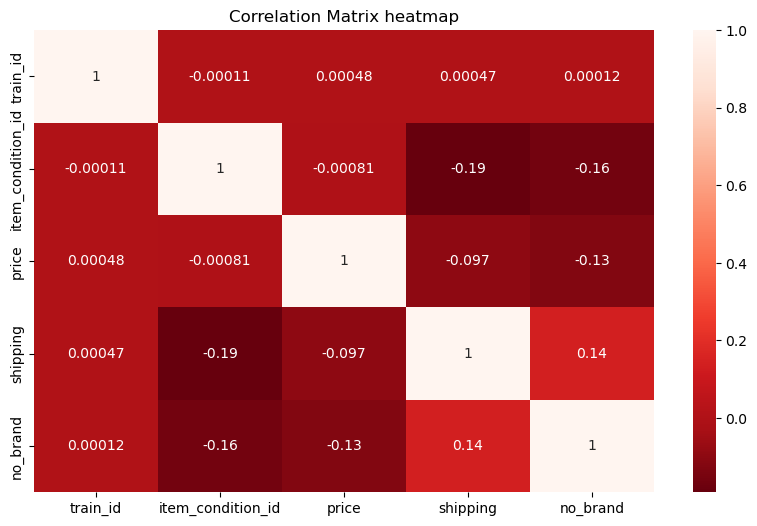

In [45]:
# Correlation Heatmap Visualization Code
corr_matrix = train.corr()

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

In [46]:
#'no_brand' and 'shipping' are highly negatively correlated with 'item_condition_id'.

# Feature Engineering & Data Pre-processing*

## Textual Data Preprocessing

### Lower Casing

In [47]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'item_description' and 'name' column of the combined DataFrame
combined['name'] = combined['name'].apply(to_lower)
combined['item_description'] = combined['item_description'].apply(to_lower)

# Apply the to_lower() function to the 'item_description' and 'name' column of the ML combined DataFrame
combined_ML['name'] = combined_ML['name'].apply(to_lower)
combined_ML['item_description'] = combined_ML['item_description'].apply(to_lower)

### Removing Punctuations

In [48]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation() function to the 'item_description' and 'name' column of the combined DataFrame
combined['name'] = combined['name'].apply(remove_punctuation)
combined['item_description'] = combined['item_description'].apply(remove_punctuation)

# Apply the remove_punctuation() function to the 'item_description' and 'name' column of the ML combined DataFrame
combined_ML['name'] = combined_ML['name'].apply(remove_punctuation)
combined_ML['item_description'] = combined_ML['item_description'].apply(remove_punctuation)

### Removing URLs & Removing words and digits contain digits.

In [49]:
# Remove URLs & Remove words and digits contain digits
# Define a function to remove digits from text
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

# Apply the remove_digits() function to the 'item_description' and 'name' column of the combined DataFrame
combined['name'] = combined['name'].apply(remove_digits)
combined['item_description'] = combined['item_description'].apply(remove_digits)

# Apply the remove_digits() function to the 'item_description' and 'name' column of the ML combined DataFrame
combined_ML['name'] = combined_ML['name'].apply(remove_digits)
combined_ML['item_description'] = combined_ML['item_description'].apply(remove_digits)

### Removing Stopwords

In [50]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words() function to the 'item_description' and 'name' column of the combined DataFrame
combined['name'] = combined['name'].apply(remove_stop_words)
combined['item_description'] = combined['item_description'].apply(remove_stop_words)

# Apply the remove_stop_words() function to the 'item_description' and 'name' column of the ML combined DataFrame
combined_ML['name'] = combined_ML['name'].apply(remove_stop_words)
combined_ML['item_description'] = combined_ML['item_description'].apply(remove_stop_words)

### Text Vectorization

In [51]:
# Vectorizing Text
# Create the object of Count Vectorizer
cv = CountVectorizer(min_df=10)
# setting min_df = 10

# Fit the vectorizer using the name column
X_name = cv.fit_transform(combined['name'])

In [52]:
X_name

<2175894x20470 sparse matrix of type '<class 'numpy.int64'>'
	with 8148734 stored elements in Compressed Sparse Row format>

In [53]:
# Vectorizing Text
# Create the object of Count Vectorizer
cv = CountVectorizer()

# Fit the vectorizer using the category_name column
X_category = cv.fit_transform(combined['category_name'])
     

In [54]:
X_category

<2175894x1022 sparse matrix of type '<class 'numpy.int64'>'
	with 8711929 stored elements in Compressed Sparse Row format>

In [55]:
# Vectorizing Text
# Create the object of Tfidf Vectorizer
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')

# Fit the vectorizer using the item_description column
X_description = tv.fit_transform(combined['item_description'])
     

In [56]:

# Vectorizing Text
# Create the object of Label Binarizer
lb = LabelBinarizer(sparse_output=True)

# Fit the Label Binarizer using the brand_name column
X_brand = lb.fit_transform(combined['brand_name'])
     

## CSR_Matrix & Sparse Matrices

In [57]:
# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(combined[['item_condition_id', 'shipping']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()
     

## Data Splitting

In [58]:
# Split the sparse_merge dataset into the training and test sets
X_train_sparse = sparse_merge[:train_size]

X_test = sparse_merge[train_size:]

### Cross Validation

In [59]:
# Specify the proportion of data for the validation set
eval_size = 0.10

# Create KFold cross-validation object
kf = KFold(n_splits=round(1. / eval_size))

# Initialize variables to store train and validation indices
train_indices, valid_indices = None, None

# Loop through the KFold splits
for train_index, valid_index in kf.split(X_train_sparse):
    train_indices, valid_indices = train_index, valid_index
    break  # Stop after the first fold

# Split the dataset into training and validation sets
X_train, y_train = X_train_sparse[train_indices], y[train_indices]
X_valid, y_valid = X_train_sparse[valid_indices], y[valid_indices]

# ML Model Implementation*

In [60]:
def rmsle(y, y0):
    """
    Calculate the Root Mean Square Error (RMSE) between two arrays.

    Parameters:
    y (array-like): Ground truth values.
    y0 (array-like): Predicted values.

    Returns:
    float: The RMSE between y and y0.
    """
    assert len(y) == len(y0)
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y0), 2)))

## ML Model - 1 : Linear Regression

In [61]:
# ML Model - 1 Implementation
# Measure the start time
start_time = time.time()

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
preds_valid = model.predict(X_valid)

# Calculate the time taken for Linear Regression training
training_time = time.time() - start_time

# Calculate and print the Root Mean Squared Logarithmic Error (RMSLE) on the validation set
rmsle_score = rmsle(np.expm1(y_valid), np.expm1(preds_valid))
print('[{}] Linear Regression completed.'.format(training_time))
print("Linear Regression RMSLE: " + str(rmsle_score))

[850.7404704093933] Linear Regression completed.
Linear Regression RMSLE: 0.47477144625218176


In [62]:
# Transform the prices back to its original price
np.expm1(preds_valid)

array([  9.43016372, 105.39038792,   9.43658446, ...,  29.34657959,
         8.71841418,  11.88133805])

In [63]:
#The performance of the Linear Regression model, as measured by the Root Mean Squared Logarithmic Error (RMSLE),resulted in a value of 0.4748.
#The RMSLE is a metric commonly used to evaluate regression models, and a lower RMSLE indicates a better model performance.

## ML Model - 2 : Random Forest

In [64]:
# ML Model - 2 Implementation
# Create a Random Forest model with specified parameters
model2 = RandomForestRegressor(
    n_estimators=100,        # Adjust the number of trees
    max_depth=10,            # Limit tree depth
    min_samples_split=5,     # Increase minimum samples per split
    max_features='sqrt',     # Set max features
    n_jobs=-1                # Use all available CPU cores
)

# Measure the start time
start_time = time.time()

# Train the Random Forest model on the training data
model2.fit(X_train, y_train)

# Make predictions on the validation set
rf_pred = model2.predict(X_valid)

# Calculate and print the time taken for Random Forest training
training_time = time.time() - start_time

# Calculate and print the Root Mean Squared Logarithmic Error (RMSLE) on the validation set
rmsle_score = rmsle(np.expm1(y_valid), np.expm1(rf_pred))
print('[{}] Random Forest completed.'.format(training_time))
print("Random Forest RMSLE: " + str(rmsle_score))

[38.459036350250244] Random Forest completed.
Random Forest RMSLE: 0.7202344797830085


In [65]:
# Transform the prices back to its original price
np.expm1(rf_pred)   

array([17.75441162, 20.30540614, 18.10034013, ..., 18.05821724,
       17.81269539, 18.0989942 ])

In [66]:
#The performance of the Random Forest model, as assessed by the Root Mean Squared Logarithmic Error (RMSLE), resulted in a value of 0.7192.
#The RMSLE is a common metric used to evaluate regression models, where a lower RMSLE indicates better performance. 
#In this case, the RMSLE of 0.7192 reflects the model's accuracy in predicting prices for online sellers.

## ML Model - 3 : Ridge Regression

In [67]:
# ML Model - 3 Implementation
# Create a Ridge Regression model
model3 = Ridge(max_iter=100)

# Train the model and make predictions as usual
model3.fit(X_train, y_train)
ridge_pred = model3.predict(X_valid)

# Calculate and print the time taken for Random Forest training
training_time = time.time() - start_time

# Calculate and print the Root Mean Squared Logarithmic Error (RMSLE) on the validation set
rmsle_score = rmsle(np.expm1(y_valid), np.expm1(ridge_pred))
print('[{}] Ridge Regression completed.'.format(training_time))
print("Ridge Regression RMSLE: " + str(rmsle_score))

[55.82325506210327] Ridge Regression completed.
Ridge Regression RMSLE: 0.47436649956367954


In [68]:
# Transform the prices back to its original price
np.expm1(ridge_pred)
     

array([ 9.53459116, 86.93398834,  8.61448987, ..., 23.92145188,
        8.27854126, 11.9653454 ])

In [69]:
#The performance of the Ridge Regression model, as evaluated by the Root Mean Squared Logarithmic Error (RMSLE), resulted in a value of 0.4745. 
#RMSLE is a widely-used metric for assessing regression models, where a lower RMSLE signifies better predictive accuracy.
#In this instance, an RMSLE of 0.4745 indicates the model's effectiveness in forecasting prices for online sellers.

#The Ridge Regression model has displayed strong performance, with an RMSLE of 0.4745, demonstrating its capacity to make accurate price predictions.
#It is particularly well-suited for situations where the dataset exhibits multicollinearity among predictor variables.

In [70]:
#From the RMSLE values we can see that the Ridge Regression model is best model for our data.

#Here we get the RMSLE value is 0.4745. Lower RMSLE signifies better predictive accuracy.

#The Ridge Regression model is a valuable choice for the price prediction task, with an RMSLE of 0.4745.

#While the model has shown remarkable performance, further refinements and optimizations may be explored to fine-tune 
#its predictive capabilities and meet the specific demands of the online seller recommendation project.

# Price Recommendation System*

In [71]:
# Make price predictions on the test dataset
preds = model3.predict(X_test)

# Convert the predictions back to the original scale from logarithmic scale
predicted_prices = np.expm1(preds)

# Assign the predicted prices to the "price" column in the submission DataFrame
submission["price"] = predicted_prices

# Save the submission DataFrame to a CSV file without index
submission.to_csv("submission_ridge.csv", index=False)

In [72]:
# Display the submission DataFrame
submission

,test_id,price
0,0,10.469296
1,1,12.640885
2,2,48.184397
3,3,16.020902
4,4,7.316011
...,...,...
693354,693354,23.549085
693355,693355,27.901060
693356,693356,6.598073
693357,693357,17.050394


# Conclusion

### Exploratory Data Analysis (EDA) Insights:

### Machine Learning Model Insights: